In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, Eq, solve

In [7]:
# Define variables for f1 and f2
f1, f2 = symbols('f1 f2')

# Distances
z1 = 2.0  # m (distance to the first lens)
z2 = 0.30   # m (distance from the second lens to the focus point)
d = 0.20   # m (distance between the two lenses)

# Propagation matrices
M1 = np.array([[1, z1], [0, 1]])   # Propagation to the first lens
M2 = np.array([[1, d], [0, 1]])    # Propagation between the lenses
M3 = np.array([[1, z2], [0, 1]])   # Final propagation

# Thin lens matrices (symbolic for f1 and f2)
L1 = np.array([[1, 0], [-1/f1, 1]])  # Defocusing lens
L2 = np.array([[1, 0], [-1/f2, 1]])  # Focusing lens

# Total matrix = M3 * L2 * M2 * L1 * M1
total_matrix = M3 @ L2 @ M2 @ L1 @ M1

# Extract matrix elements A, B, C, D
A, B, C, D = total_matrix[0, 0], total_matrix[0, 1], total_matrix[1, 0], total_matrix[1, 1]

# Starting parameters
starting_beam_width = 1 * 1e-3  # m
divergence_beam = 0.1 * 1e-3     # m / m radias

# Solve for f1 and f2 such that divergence at the end is 0
# equation = Eq(C * starting_beam_width + D * divergence_beam, 0)
# solutions = solve(equation, (f1, f2))

startin_parameters = np.array([starting_beam_width, divergence_beam])

equation = Eq(total_matrix.dot(startin_parameters)[0], 0)
solutions = solve(equation, (f1, f2))

print("Equations for f1, f2:", solutions)

Equations for f1, f2: [(12.0*(25.0*f2 - 3.0)/(625.0*f2 - 183.0), f2)]


In [44]:
f2_picked = 150 * 1e-3
f1_calculated = solutions[0][0].subs({f2: f2_picked}).evalf()
print(f"Valus: f1 = {f1_calculated * 1e3:.2f} mm,  f2 = {f2_picked * 1e3:.2f} mm")

Valus: f1 = -100.84 mm,  f2 = 150.00 mm


In [41]:
# Matrixes for plotting

def get_propagating_air(z_length: float) -> np.array:
    return np.array([[1, z_length], [0, 1]])

def get_lens_matrix(focal_length: float) -> np.array:
    return np.array([[1, 0], [-1/focal_length, 1]])

startin_parameters = np.array([starting_beam_width, divergence_beam])
defocus_lens = get_lens_matrix(focal_length=f1_calculated)
focus_lens = get_lens_matrix(focal_length=f2_picked)

In [42]:
vector_defocus = get_propagating_air(z1).dot(startin_parameters)
vector_focus = get_propagating_air(d).dot(defocus_lens.dot(vector_defocus))
vector_entrance = get_propagating_air(z2).dot(focus_lens.dot(vector_focus))

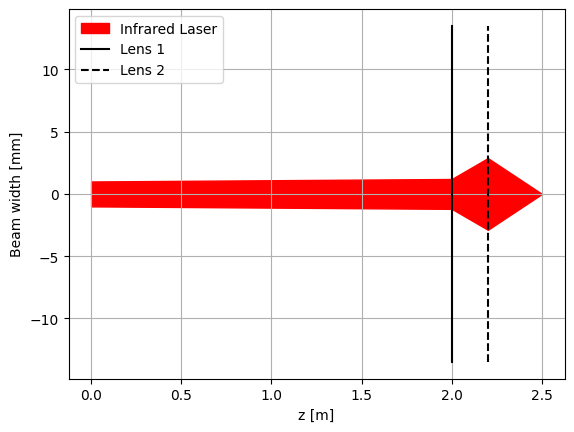

In [50]:
starting_z = 0
starting_y = starting_beam_width
i = 1

for x, y in zip(
    [z1, d, z2],
    [vector_defocus, vector_focus, vector_entrance]
):
    end_z = starting_z + x
    end_y = float(y[0])
    
    xs = np.linspace(starting_z, end_z, 100)
    ys = np.linspace(starting_y, end_y, 100)
    
    plt.fill_between(x=xs, y1=ys * 1e3, y2=-ys * 1e3, color="Red", label="Infrared Laser" if i == 1 else None)
    
    i += 1
    starting_z = end_z
    starting_y = end_y

    
lens_radius = 0.0135 * 1e3 # m

plt.plot([z1, z1], [-lens_radius, lens_radius], color="black", label="Lens 1")

plt.plot([z1 + d, z1 + d], [-lens_radius, lens_radius], color="black", linestyle="--", label="Lens 2")

plt.ylabel('Beam width [mm]')
plt.legend()
plt.xlabel('z [m]')    
plt.grid()
plt.show()